# Class activation map is an unsupervised way of doing object localization with accuracy near par with supervised methods

# following model trained on 300 images. fine tuned final few layers of VGG19

# QUESTIONS AT BOTTOM

In [1]:
import numpy as np
from keras.models import Sequential, load_model, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import GlobalAveragePooling2D
from keras.callbacks import TensorBoard
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import cv2

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from CAM import predict_label_with_cam, get_multi_stacked_cam, overlay_cam_large_image, overlay_multi_stacked_cam_large_image

### index 0 is blank space
### index 1 is gray matter 
### index 2 is white matter

In [3]:
CLASS_IDX_BLANK = 0
CLASS_IDX_GRAY = 1
CLASS_IDX_WHITE = 2

In [4]:
# load model
model = load_model('VGG19_trained.h5')

# Generating just the CAM

In [11]:
IMAGE_PATH = 'testwhite.jpg'
im = plt.imread(IMAGE_PATH)

[  1.62941342e-05   2.48435279e-03   9.97499287e-01]


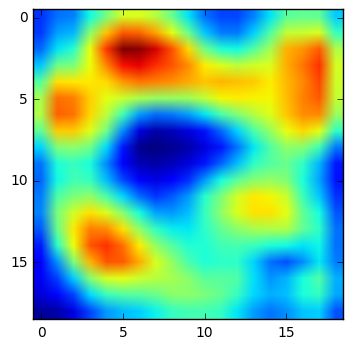

In [12]:
# get cam of a cat picture
cam, pred = predict_label_with_cam(model, im, 'block5_conv4')
print(pred)
plt.imshow(cam)

# wow almost 100% confidence in the prediction (correct prediction)

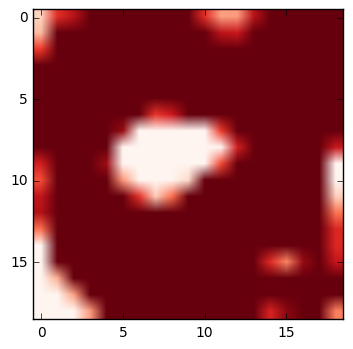

In [13]:
# with color map
cmap = 'Reds'
cam, pred = predict_label_with_cam(model, im, 'block5_conv4', cmap = cmap)
plt.imshow(cam)

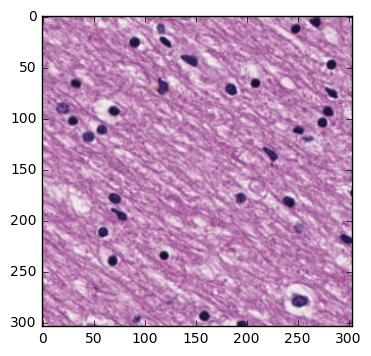

In [8]:
# original image
plt.imshow(plt.imread(IMAGE_PATH))

# Generating CAM as overlay over original image

In [8]:
IMAGE_PATH = 'testgray.jpg'
im = plt.imread(IMAGE_PATH)

In [9]:
# cam as overlay
cam, pred = predict_label_with_cam(model, im, 'block5_conv4', overlay=True, overlay_alpha=0.5)
print(pred)

[  2.29042380e-05   9.96856213e-01   3.12085799e-03]


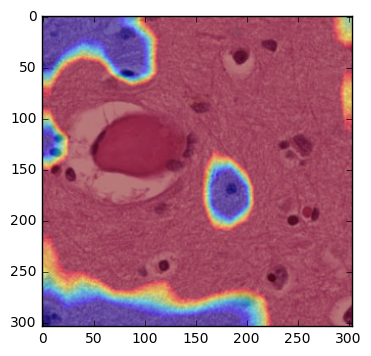

In [10]:
plt.imshow(cam)

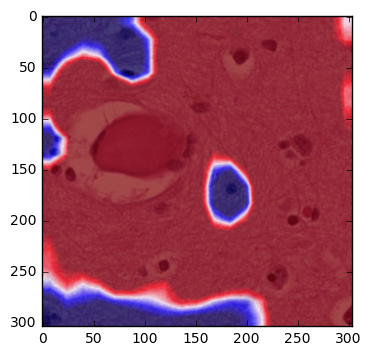

In [19]:
# with other color map with less transparency
cmap = 'seismic'
cam, pred = predict_label_with_cam(model, im, 'block5_conv4', overlay=True, overlay_alpha=0.3,cmap=cmap)
plt.imshow(cam)

# Generating more than one CAM to see which parts of the image influence class decisions

In [14]:
IMAGE_PATH = 'testwhite2.jpg'
im = plt.imread(IMAGE_PATH)

In [15]:
# run custom function on a dog image
cam_blank, pred = predict_label_with_cam(model, im, 'block5_conv4', class_idx=CLASS_IDX_BLANK, overlay=True, overlay_alpha=0.5)
cam_gray, pred = predict_label_with_cam(model, im, 'block5_conv4', class_idx=CLASS_IDX_GRAY, overlay=True, overlay_alpha=0.5)
cam_white, pred = predict_label_with_cam(model, im, 'block5_conv4', class_idx=CLASS_IDX_WHITE, overlay=True, overlay_alpha=0.5)

In [16]:
# probability predictions for each class
pred

array([  6.07074696e-07,   5.62563189e-04,   9.99436796e-01], dtype=float32)

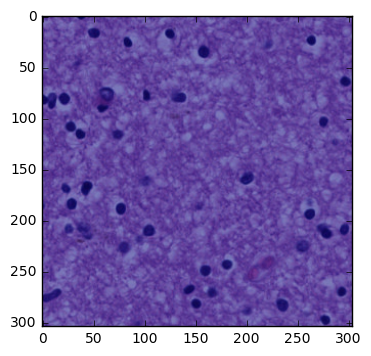

In [17]:
plt.imshow(cam_blank)

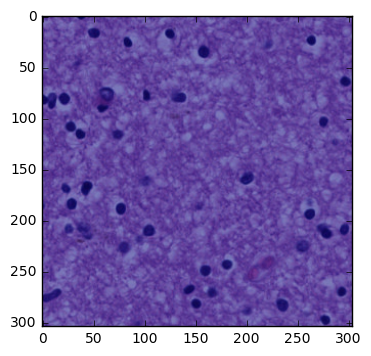

In [18]:
plt.imshow(cam_gray)

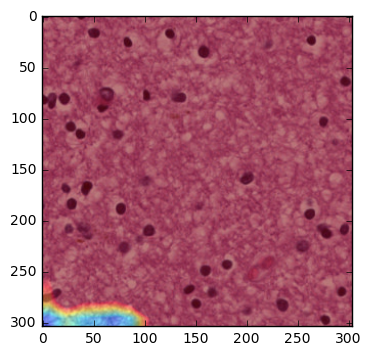

In [19]:
# that is one strong correct prediction...

plt.imshow(cam_white)

# Generating stacked CAM's on image to see which parts of the image influence class decisions

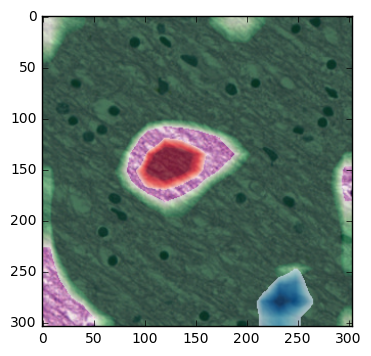

In [4]:
IMAGE_PATH = 'testwhite.jpg'
classes = ['blank', 'gray', 'white']

im=plt.imread(IMAGE_PATH)

# threshold = 0.4 # only show CAM if a classes' probability is greater than 40%
cam, pred = get_multi_stacked_cam(model, im, classes,'block5_conv4', show_top_x_classes=3)#threshold=threshold)

plt.imshow(cam)

In [5]:
pred

{'blank': [1.6294134e-05, 'Reds'],
 'gray': [0.0024843528, 'Blues'],
 'white': [0.99749929, 'Greens']}

[  1.46041316e-06   9.99024153e-01   9.74460621e-04] ['blank', 'gray', 'white']


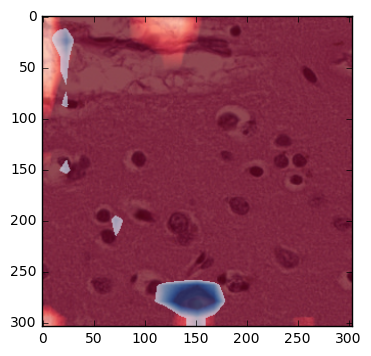

In [34]:
show_top_x_classes = 3 # only show the top 3 predictions
cam, pred = get_multi_stacked_cam(model, im, classes, 'block5_conv4', show_top_x_classes=show_top_x_classes)

plt.imshow(cam)

In [35]:
pred

{'blank': [1.4604132e-06, 'Greens'],
 'gray': [0.99902415, 'Reds'],
 'white': [0.00097446062, 'Blues']}

# Generating CAM on a large image

In [5]:
blank1 = plt.imread('data/all/train/blank/Bank3B (103).jpg')
blank2 = plt.imread('data/all/train/blank/Bank3B (104).jpg')
grey1 = plt.imread('data/all/train/gray/Gray (1006).jpg')
grey2 = plt.imread('data/all/train/gray/Gray (1007).jpg')
white1 = plt.imread('data/all/train/white/WhiteM1 (113).jpg')
white2 = plt.imread('data/all/train/white/WhiteM1 (114).jpg')

In [6]:
t1 = np.concatenate((blank1, white1, grey1),axis=1)
t2 = np.concatenate((grey2, blank2, white2),axis=1)
new_img = np.concatenate((t1, t2),axis=0)

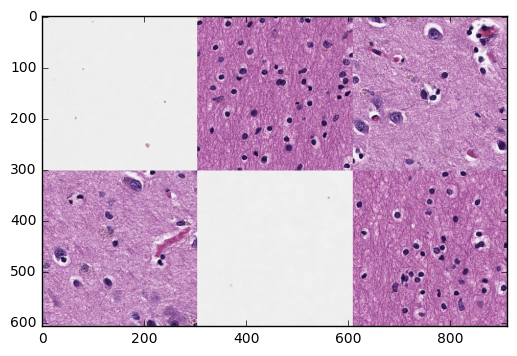

In [7]:
plt.imshow(new_img)

In [30]:
plt.imsave("multi_tiled_tissue.jpg", new_img)

In [7]:
cam = overlay_cam_large_image(model, 304, new_img, 'block5_conv4', CLASS_IDX_GRAY, cmap='seismic')

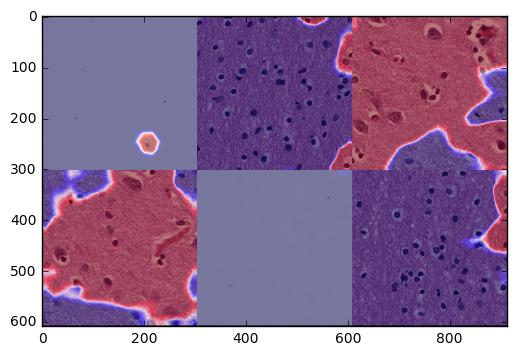

In [8]:
plt.imshow(cam)

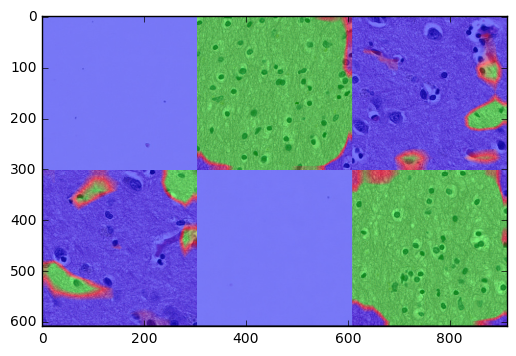

In [9]:
cam = overlay_cam_large_image(model, 304, new_img, 'block5_conv4', CLASS_IDX_WHITE, cmap='brg')
plt.imshow(cam)

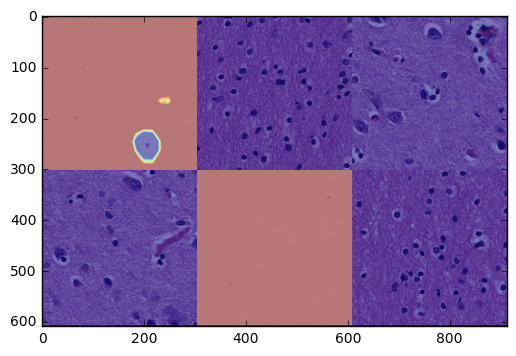

In [34]:
cam = overlay_cam_large_image(model, 304, new_img, 'block5_conv4', CLASS_IDX_BLANK)
plt.imshow(cam)

# Generating MultiLayer CAM on large image

In [5]:
grey1 = plt.imread('data/all/train/gray/Gray (1006).jpg')
grey2 = plt.imread('data/all/train/gray/Gray (1007).jpg')
grey3 = plt.imread('data/all/train/gray/Gray (1008).jpg')
white1 = plt.imread('data/all/train/white/WhiteM1 (113).jpg')
white2 = plt.imread('data/all/train/white/WhiteM1 (114).jpg')
white3 = plt.imread('data/all/train/white/WhiteM1 (115).jpg')

t1 = np.concatenate((grey1, white1, grey2),axis=1)
t2 = np.concatenate((grey3, white2, white3),axis=1)
new_img = np.concatenate((t1, t2),axis=0)

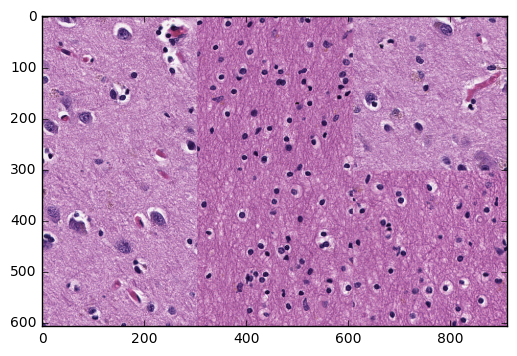

In [6]:
plt.imshow(new_img)

In [11]:
plt.imsave("multi_tiled_tissue_NO_BLANK.jpg", new_img)

In [8]:
cam = overlay_multi_stacked_cam_large_image(model, 304,['Blank space', 'Brain tissue: Gray Matter', 'Brain tissue: White Matter'], new_img, 'block5_conv4', overlay_alpha=0.3)

Blank space --> Red
Brain tissue: Gray Matter --> Blue
Brain tissue: White Matter --> Green
Analyzing......Complete


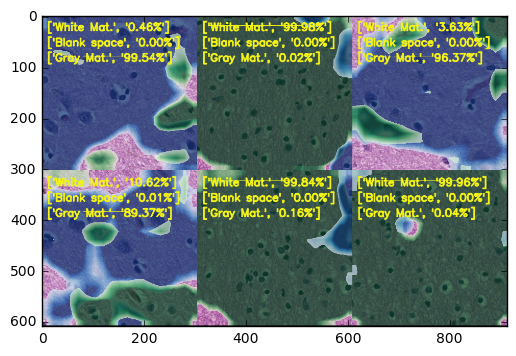

In [7]:
plt.imshow(cam)

In [9]:
plt.imsave("multi_tiled_tissue_NO_BLANK_CAM.jpg", cam)

# questions for TGH research

# predicting multiple images at once

In [52]:
import glob
images = glob.glob('predict_batch_images_all_white/*')[:10]

for image in images:
    x=plt.imread(image)
    x=np.expand_dims(x,axis=0)
    pred=model.predict(x)
    print(pred)

[[  0.00000000e+00   4.37741874e-38   1.00000000e+00]]
[[  0.00000000e+00   1.40129846e-45   1.00000000e+00]]
[[ 0.  0.  1.]]
[[  0.00000000e+00   5.73894639e-39   1.00000000e+00]]
[[  0.00000000e+00   8.02362126e-30   1.00000000e+00]]
[[  0.00000000e+00   4.06917527e-34   1.00000000e+00]]
[[  0.00000000e+00   7.23882135e-29   1.00000000e+00]]
[[  0.00000000e+00   7.49036068e-41   1.00000000e+00]]
[[  0.00000000e+00   6.09760555e-29   1.00000000e+00]]
[[  0.00000000e+00   1.16221127e-25   1.00000000e+00]]
